In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Conv2D, Flatten, MaxPool2D, Dense
from tensorflow.keras import Sequential 
from tensorflow.keras.activations import relu
from tensorflow.keras.optimizers import Adam

In [2]:
train = pd.read_csv("/content/drive/MyDrive/Digit Recognizer/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Digit Recognizer/test.csv")

In [3]:
from sklearn.model_selection import train_test_split
X = train.drop("label", axis=1)
y = train["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

View Random Images to Become One with the Data

In [4]:
import random

def view_random_image(X_train, y_train):
  num = random.randint(0,33600)
  img = X_train.iloc[num].to_numpy()
  img = img.reshape((28,28))
  plt.imshow(img)
  plt.title(y_train[num])
  plt.show()

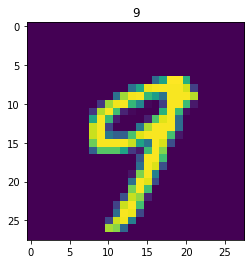

In [5]:
view_random_image(X_train=X_train, y_train=y_train)

PreProcessing

In [6]:
X_train = X_train/255.
X_test = X_test/255.

In [7]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

In [8]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

Creating Model

In [9]:
#same as TinyVGG
mdl1 = Sequential([
                  Conv2D(10, 3, activation="relu", input_shape=(28,28,1)),
                  Conv2D(10, 3, activation="relu"),
                  MaxPool2D(),
                  Conv2D(10, 3, activation="relu"),
                  Conv2D(10, 3, activation="relu"),
                  MaxPool2D(),
                  Flatten(),
                  Dense(10, activation="softmax")
])

mdl1.compile(loss="categorical_crossentropy",
             optimizer=Adam(),
             metrics=["accuracy"])

In [10]:
history1 = mdl1.fit(X_train, y_train,
                    epochs=5,
                    validation_data = (X_test, y_test))

Epoch 1/5
1050/1050 [==============================] - 35s 33ms/step - loss: 0.3372 - accuracy: 0.8914 - val_loss: 0.1490 - val_accuracy: 0.9558
Epoch 2/5
1050/1050 [==============================] - 33s 32ms/step - loss: 0.1223 - accuracy: 0.9628 - val_loss: 0.1103 - val_accuracy: 0.9649
Epoch 3/5
1050/1050 [==============================] - 35s 33ms/step - loss: 0.0898 - accuracy: 0.9722 - val_loss: 0.0918 - val_accuracy: 0.9715
Epoch 4/5
1050/1050 [==============================] - 33s 31ms/step - loss: 0.0726 - accuracy: 0.9773 - val_loss: 0.0836 - val_accuracy: 0.9724
Epoch 5/5
1050/1050 [==============================] - 32s 31ms/step - loss: 0.0621 - accuracy: 0.9812 - val_loss: 0.0601 - val_accuracy: 0.9810


Evaluating the Model

In [11]:
def plot_loss_acc(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  epochs = range(len(history.history["loss"]))
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.legend()

  plt.figure()
  plt.plot(epochs, history.history["accuracy"], label="train_acc")
  plt.plot(epochs, history.history["val_accuracy"], label="val_acc")
  plt.legend();

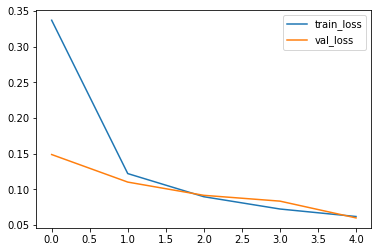

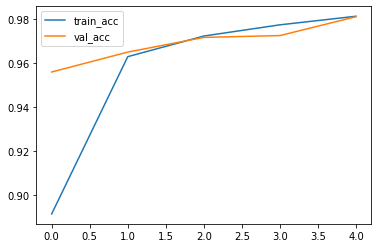

In [12]:
plot_loss_acc(history1)

TinyVGG architecture is very enough. **%98.10**